[Source Dataset Heart Disease Cleveland UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)

There are 13 attributes

1. age: age in years
1. sex: sex (1 = male; 0 = female)
1. cp: chest pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
1. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
1. chol: serum cholestoral in mg/dl
1. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
1. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
1. thalach: maximum heart rate achieved
1. exang: exercise induced angina (1 = yes; 0 = no)
1. oldpeak = ST depression induced by exercise relative to rest
1. slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
1. ca: number of major vessels (0-3) colored by flourosopy
1. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
1. condition: 0 = no disease, 1 = disease

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

import warnings
warnings.simplefilter('ignore')

# Import data

In [31]:
df = pd.read_csv('../data/raw/heart_cleveland_upload.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [32]:
print('Dataset size: ', df.shape)

Dataset size:  (297, 14)


In [33]:
print('NA in dataset')
df.isna().sum()

NA in dataset


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [34]:
print('Number of duplicates: ', df.duplicated().sum())

Number of duplicates:  0


In [35]:
df.condition.value_counts(normalize=True) * 100

0    53.872054
1    46.127946
Name: condition, dtype: float64

In [36]:
print('Unique values for each column')
df.nunique()

Unique values for each column


age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

**Dataset conclusions**
* Not NA and duplicates
* Target is balanced
* Numerical: age, trestbps, chol, thalach, oldpeak
* Categorical: sex, cp, fbs, restecg, exang, slope, ca, thal

# Exploratory Data Analysis

In [37]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [38]:
def sets_for_plot(plot, title='', title_fontsize=22,
                  xlabel='', xlabel_fontsize=18,
                  ylabel='', ylabel_fontsize=18):
    plot.set_title(title, fontsize=title_fontsize)
    plot.set_xlabel(xlabel, fontsize=xlabel_fontsize)
    plot.set_ylabel(ylabel, fontsize=ylabel_fontsize)

In [39]:
df.condition = df.condition.map({0: 'no disease', 1: 'disease'})

### Correlation heatmap 

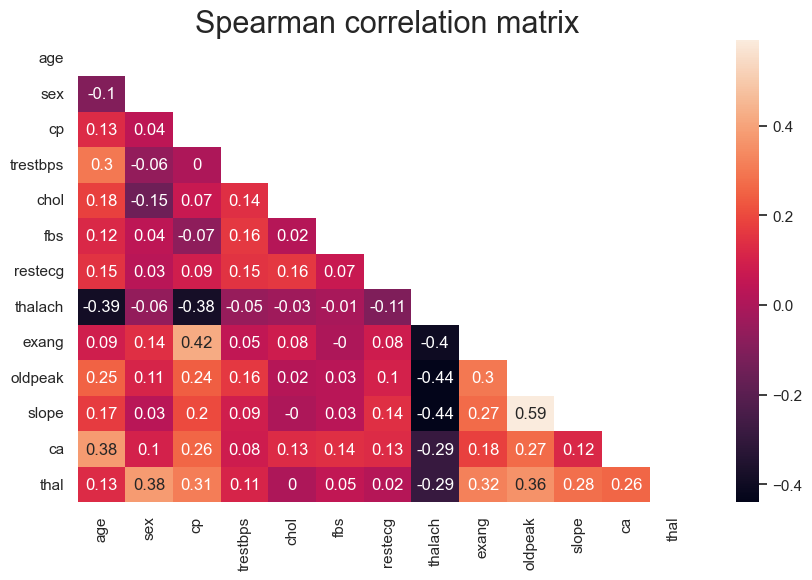

In [44]:
plt.figure(figsize=(10,6))
matrix = np.triu(df.corr(method='spearman'))
hm = sns.heatmap(df.corr(method='spearman').round(2), annot=True, mask=matrix)
sets_for_plot(hm, title='Spearman correlation matrix')

**Conclusions**
* Use spearman because there are categorical values
* Сorrelation values are not higher than 0.6 modulo

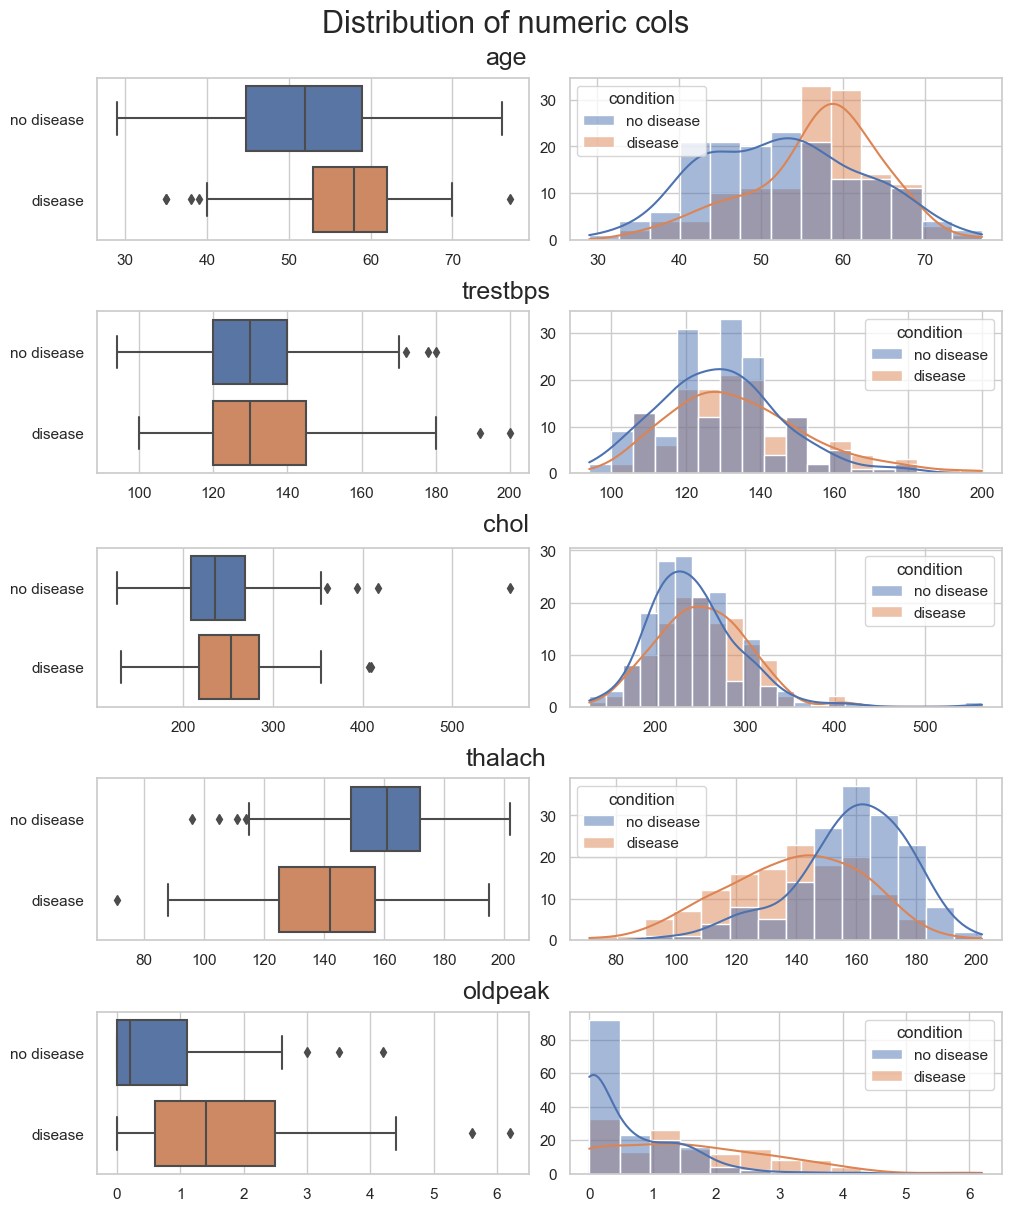

In [41]:
fig = plt.figure(constrained_layout=True, figsize=(10, 12))
fig.suptitle('Distribution of numeric cols', fontsize=22)

subfigs = fig.subfigures(nrows=len(num_cols), ncols=1)

for i, col in enumerate(num_cols):
    subfigs[i].suptitle(col, fontsize=18)

    axes = subfigs[i].subplots(nrows=1, ncols=2)
    sns.boxplot(df, x=col, y='condition', ax=axes[0], orient='h')
    sets_for_plot(axes[0])
    
    sns.histplot(df, x=col, hue='condition', ax=axes[1], kde=True)
    sets_for_plot(axes[1])

**Conclusions**
* Noticeable differences in distributions for oldpeak, age, thalach

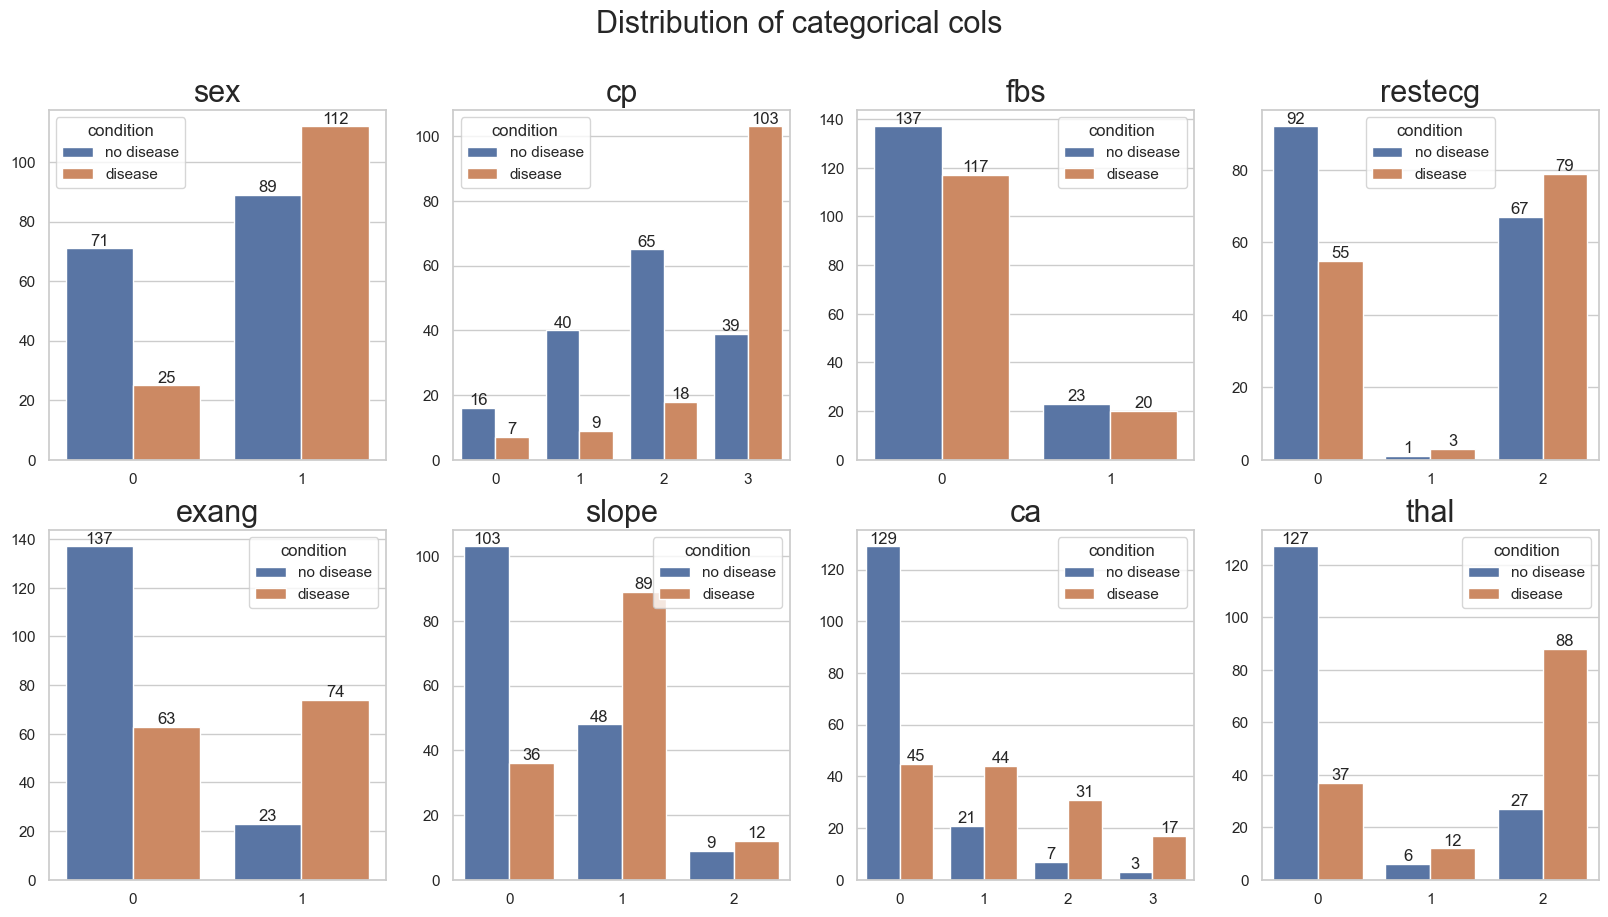

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution of categorical cols', fontsize=22)

axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(df, x=col, hue='condition', ax=axes[i])
    sets_for_plot(axes[i], title=col)
    for container in axes[i].containers:
        axes[i].bar_label(container)